# Do the "Hello World" example on a 2-qubit Bell State

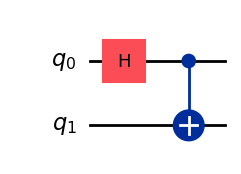

In [11]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')

In [16]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observable = [ZZ, ZI, IZ, XX, XI, IX]

# Step 2: Optimization

# Step 3: Execute on the Backend

In [17]:
from qiskit_aer.primitives import Estimator

Estimator = Estimator()

job = Estimator.run([qc] * len(observable), observable)

job.result()


EstimatorResult(values=array([ 1.        ,  0.01367188,  0.01367188,  1.        , -0.015625  ,
       -0.015625  ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0024626, 'sample_measure_time': 0.0009204, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 7564, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 6, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9998130798339844, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0024626, 'sample_measure_time': 0.000920

# Step 4: Post-Process (and plotting)

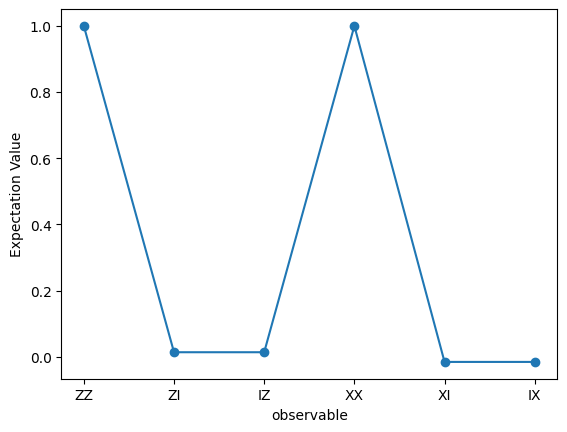

In [20]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('observable')
plt.ylabel('Expectation Value')
plt.show()